In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('./villes.csv', sep=';') 
X = data.iloc[:, 1:13].values 
labels = data.iloc[:, 0].values

In [ ]:
### Question 1

In [ ]:
import sklearn 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
print(scaled)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(scaled)
print(X_pca)

In [ ]:
clustering = KMeans(n_clusters=3).fit_predict(X_pca)

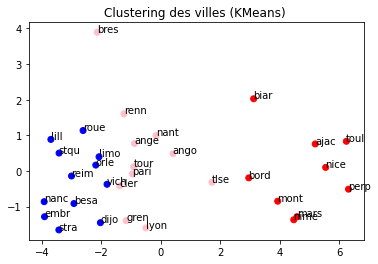

In [ ]:
plt.title("Clustering des villes (KMeans) ")
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [ ]:
### Question 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering

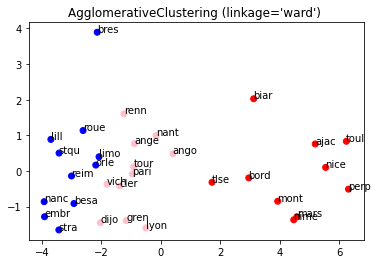

In [ ]:
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_pca)

plt.title("AgglomerativeClustering (linkage='ward') ")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()



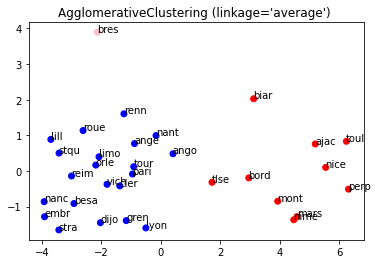

In [ ]:
clustering_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X_pca)

plt.title("AgglomerativeClustering (linkage='average') ")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

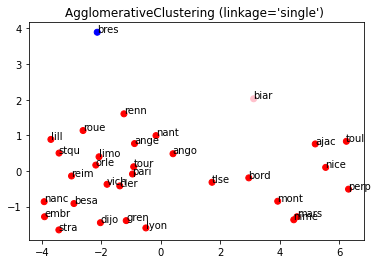

In [ ]:
clustering_single = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X_pca)

plt.title("AgglomerativeClustering (linkage='single') ")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_single, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [ ]:
#Comparer en analysant les résultats visuels obtenus
#Ward : on a l'impression que le clustering se fait de manière verticale, la séparation se fait selon certaines valeurs (ex: -2 est une limite)
#Average : le clustering regroupe les données proches entre elles, on peut penser qu'un calcul de distance entre les données est réalisé et le clustering regroupe celles dont la distance est proche de la moyenne
#Single : le clustering isole les données ponctuelles, très éloignées des autres

#Comparer en analysant les résultats visuels obtenus
#Ward : on a l'impression que le clustering se fait de manière verticale, la séparation se fait selon certaines valeurs (ex: -2 est une limite)
#Average : le clustering regroupe les données proches entre elles, on peut penser qu'un calcul de distance entre les données est réalisé et le clustering regroupe celles dont la distance est proche de la moyenne
#Single : le clustering isole les données ponctuelles, très éloignées des autres

In [ ]:
### Question 3

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in range(2,7):
  clustering = KMeans(n_clusters=i).fit_predict(X_pca)
  score = silhouette_score(X_pca, clustering)
  print("Pour cluster : ", i)
  print("Score = ", score)


Pour cluster :  2
Score =  0.625557719180767
Pour cluster :  3
Score =  0.388094259471959
Pour cluster :  4
Score =  0.39249385306689255
Pour cluster :  5
Score =  0.31882676940894095
Pour cluster :  6
Score =  0.3033931229000892


In [ ]:
#La meilleure partition se fait en 2 clusters car l'indice de score de Silhouette est la plus élevée 

In [ ]:
### Question 4

In [ ]:
for i in range(2,7):
  clustering_ward = AgglomerativeClustering(n_clusters=i, linkage='ward').fit_predict(X_pca)
  score = silhouette_score(X_pca, clustering_ward)
  print("Pour cluster : " +  str(i) + " , Score = " + str(score))

# Meilleur partition : Cluster 2

Pour cluster : 2 , Score = 0.625557719180767
Pour cluster : 3 , Score = 0.3680782608000546
Pour cluster : 4 , Score = 0.3182505663395759
Pour cluster : 5 , Score = 0.3327321988641233
Pour cluster : 6 , Score = 0.32134101217226474


In [ ]:
for i in range(2,7):
  clustering_average = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(X_pca)
  score = silhouette_score(X_pca, clustering_average)
  print("Pour cluster : " +  str(i) + " , Score = " + str(score))

# Meilleur partition : Cluster 2

Pour cluster : 2 , Score = 0.625557719180767
Pour cluster : 3 , Score = 0.4956874462691089
Pour cluster : 4 , Score = 0.40409248129693376
Pour cluster : 5 , Score = 0.33943752813336847
Pour cluster : 6 , Score = 0.3157090741187426


In [ ]:
for i in range(2,7):
  clustering_single = AgglomerativeClustering(n_clusters=i, linkage='single').fit_predict(X_pca)
  score = silhouette_score(X_pca, clustering_single)
  print("Pour cluster : " +  str(i) + " , Score = " + str(score))

# Meilleur partition : Cluster 5

Pour cluster : 2 , Score = 0.17828947881901633
Pour cluster : 3 , Score = -0.03440482633721366
Pour cluster : 4 , Score = 0.1832179976118833
Pour cluster : 5 , Score = 0.40538301030176455
Pour cluster : 6 , Score = 0.3211771888858359


In [ ]:
### Question 5

In [ ]:
#Si nous souhaitons avoir 3 clusters, la meilleure méthode qui donnera la meilleure partition en 3 clusters est 
#la méthode qui utilise AgglomerativeClustering avec le critère d'agrégation average
#car l'addition ddes résultats du silhouette_score pour les 3 premiers clusters est supérieurs aux autres méthodes

In [ ]:
### Question 6

In [ ]:
## KMeans :
#   Avantages : Simple, Calcul rapide
#   Inconvénients : Besoin de connaître le nombre de clusters à l'avance, Produit des clusters de taille uniforme

## AgglomerativeClustering :
#   Avantages : On peut déterminer le nombre de clusters optimale, Produit des clusters homogènes
#   Inconvénients : Coût de calcul/complexité élevé, Non adapté pour de grandes tailles de données


In [ ]:
### Question 7

In [ ]:
def fonction_hybride(nom_fichier):

  #lecture du fichier 
  data = pd.read_csv(nom_fichier, sep=';') 
  X = data.iloc[:, 1:13].values 
  labels = data.iloc[:, 0].values

  #Calcul du X_pca
  scaled = scaler.fit_transform(X)
  X_pca = pca.fit_transform(scaled)

  #variables 
  best_score = 0
  tmp_clusters = 2
  var_choix = 0

  #trouver le plus haut silhouette score pour obtenir le meilleur clustering
  for i in range(2,7):

    #calcul des clustering
    clustering_Kmeans = KMeans(n_clusters=i).fit_predict(X_pca)
    clustering_average = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(X_pca)

    #calcul des silhouette score
    score_Kmeans = silhouette_score(X_pca, clustering_Kmeans)
    score_average = silhouette_score(X_pca, clustering_average)

    #calcul meilleur score silhouette et nb clusters
    if score_Kmeans > best_score :
      best_score = score_Kmeans
      tmp_clusters = i
      var_choix = 0
    if score_average > best_score : #si egal on garde Kmeans car calcul plus rapide
      best_score = score_average
      tmp_clusters = i
      var_choix = 1

  # meilleur clustering
  if var_choix == 0 :
    clustering_final = KMeans(n_clusters=tmp_clusters).fit_predict(X_pca)
    print("Kmeans")
  else :
    clustering_final = AgglomerativeClustering(n_clusters=tmp_clusters, linkage='average').fit_predict(X_pca)
    print("AgglomerativeClustering")

  #affichage
  plt.title("Visualisation graphique des données avec clustering ")

  colors = ['red','yellow','blue','pink']
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_final, cmap=matplotlib.colors.ListedColormap(colors))
  for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
  plt.show()

  #### A FINIR

Kmeans


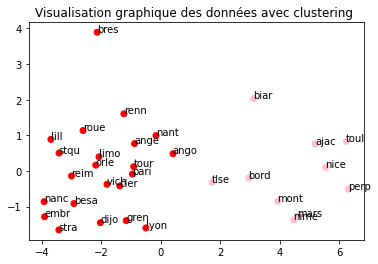

In [ ]:
fonction_hybride("villes.csv")

In [ ]:
### Question 8

AgglomerativeClustering


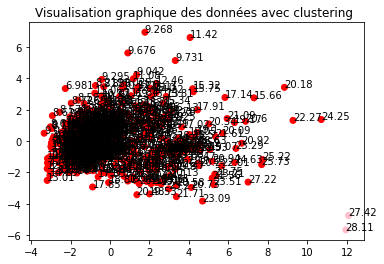

In [ ]:
fonction_hybride("wdbc.csv")

AgglomerativeClustering


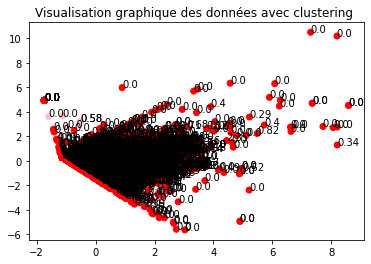

In [ ]:
fonction_hybride("spamb.csv")